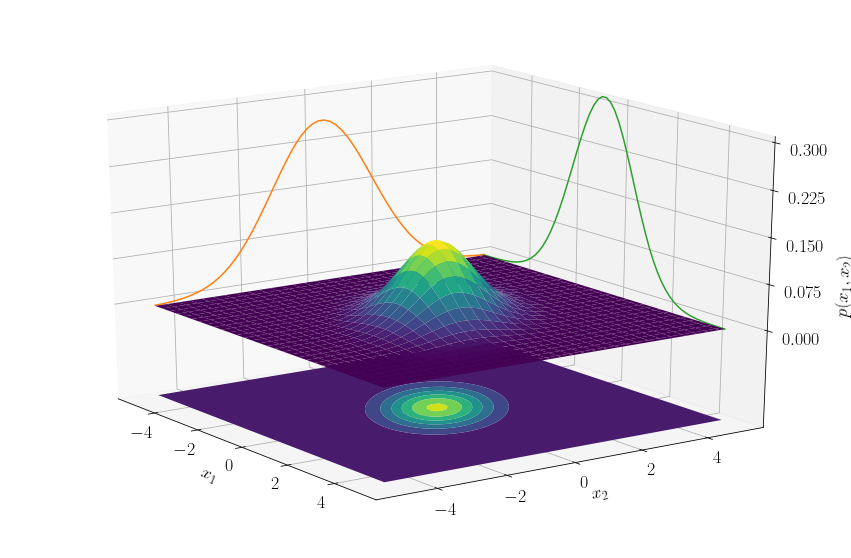

In [240]:
import numpy as np
from scipy.stats import norm, multivariate_normal
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

rstate = 1337

# set fonts
hfont = {'fontname':'Helvetica', 'size': 18}
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

min = -5
max = 5

# Our 2-dimensional distribution will be over variables X and Y
N = 60
x = np.linspace(min, max, N)
X = np.linspace(min, max, N)
y = np.linspace(min, max, N)
Y = np.linspace(min, max, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1.5 , -0.5], [-0.5,  1.25]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y



# The distribution on the variables X, Y packed into pos.
F = multivariate_normal(mu, Sigma)
Z = F.pdf(pos)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, linewidth=0.1, antialiased=True, cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis, antialiased=True)



marg_x = norm.pdf(x, mu[0],Sigma[0,0])
ax.plot(x, marg_x, zs=-5, zdir='x')

marg_y = norm.pdf(y, mu[1],Sigma[1,1])
ax.plot(y, marg_y, zs=5, zdir='y')



# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.3)
ax.set_zticks(np.linspace(0,0.3,5))

ax.set_xlabel(r'$x_1$', labelpad=10, **hfont)
ax.tick_params(axis='x', which='both', labelsize=18)

ax.set_ylabel(r'$x_2$', labelpad=10,**hfont)
ax.tick_params(axis='y', which='both', labelsize=18)

ax.set_zlabel(r'$p(x_1, x_2)$',labelpad=20, **hfont)
ax.tick_params(axis='z', which='both', labelsize=18, pad=10)

ax.view_init(20, -35)

plt.show()

